In [50]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
from sklearn.model_selection import train_test_split

filepath = 'yacht_hydrodynamics.data'
data = pd.read_csv(filepath,delimiter=' ')
display(data)

,Longitudinal_position,Primatic_coef,Length-displacement,Beam-draught,Length-beam,Froude,Resistance
0,-2.3,0.568,4.78,3.99,3.17,0.125,0.11
1,-2.3,0.568,4.78,3.99,3.17,0.150,0.27
2,-2.3,0.568,4.78,3.99,3.17,0.175,0.47
3,-2.3,0.568,4.78,3.99,3.17,0.200,0.78
4,-2.3,0.568,4.78,3.99,3.17,0.225,1.18
...,...,...,...,...,...,...,...
303,-2.3,0.600,4.34,4.23,2.73,0.350,8.47
304,-2.3,0.600,4.34,4.23,2.73,0.375,12.27
305,-2.3,0.600,4.34,4.23,2.73,0.400,19.59
306,-2.3,0.600,4.34,4.23,2.73,0.425,30.48


In [63]:
def rec(m, n, tol):
    if not type(m) == 'numpy.ndarray':
        m = np.array(m) #change m to a np array
    if not type(n) == 'numpy.ndarray':
        n = np.array(n) #change n to a np array

    l = m.size
    percent = 0
    for i in range(l):
        if np.abs(m[i]-n[i])<=tol:
            percent+=1
    return 100*(percent/l)

In [52]:
x = data.copy()
x.insert(0,'ones',np.ones(len(data)))
x.drop('Resistance',axis=1,inplace=True)
display(x)
Y = data['Resistance']
x_train, x_test, Y_train, Y_test = train_test_split(x, Y, test_size=0.5)

,ones,Longitudinal_position,Primatic_coef,Length-displacement,Beam-draught,Length-beam,Froude
0,1.0,-2.3,0.568,4.78,3.99,3.17,0.125
1,1.0,-2.3,0.568,4.78,3.99,3.17,0.150
2,1.0,-2.3,0.568,4.78,3.99,3.17,0.175
3,1.0,-2.3,0.568,4.78,3.99,3.17,0.200
4,1.0,-2.3,0.568,4.78,3.99,3.17,0.225
...,...,...,...,...,...,...,...
303,1.0,-2.3,0.600,4.34,4.23,2.73,0.350
304,1.0,-2.3,0.600,4.34,4.23,2.73,0.375
305,1.0,-2.3,0.600,4.34,4.23,2.73,0.400
306,1.0,-2.3,0.600,4.34,4.23,2.73,0.425


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

theta = Pipeline([('scaler', StandardScaler()),    ('ridge', Ridge(alpha=0.01,positive = True))])

theta.fit(x_train,Y_train)

Y_pred = theta.predict(x_test)
Y_pred_non_negative = np.clip(Y_pred, a_min=0, a_max=None)
print("RMSE for ridge regression:", np.sqrt(np.mean((Y_test-Y_pred_non_negative)**2)))

RMSE for linear regression: 8.41400150135684


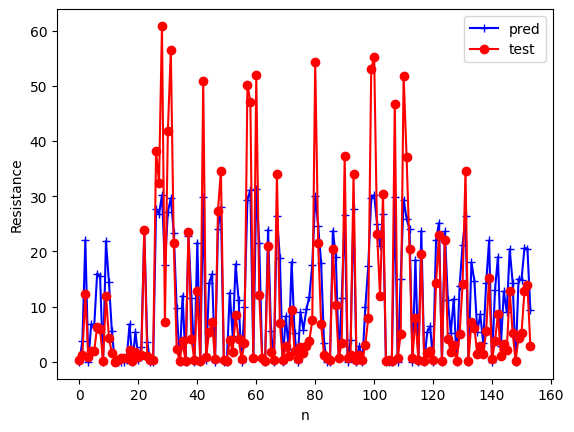

In [54]:
fig, ax = plt.subplots()
p_pred = ax.plot(Y_pred_non_negative, marker='+', c='b', label='pred')
p_test = ax.plot(Y_test.to_numpy(), marker='o', c='r', label='test')


ax.set_ylabel('Resistance')
ax.set_xlabel('n')
plt.legend()
plt.show()

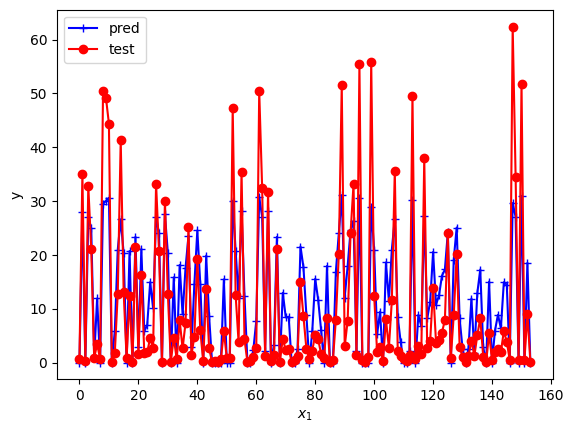

RMSE for linear regression: 8.177706743347551


In [ ]:
Y_trainpred = theta.predict(x_train)
Y_trainpred_non_negative = np.clip(Y_trainpred, a_min=0, a_max=None)
fig, ax = plt.subplots()
p_trainpred = ax.plot(Y_trainpred_non_negative, marker='+', c='b', label='pred')
p_train = ax.plot(Y_train.to_numpy(), marker='o', c='r', label='test')


ax.set_ylabel('n')
ax.set_xlabel('Resistance')
plt.legend()
plt.show()
print("RMSE for ridge regression:", np.sqrt(np.mean((Y_train-Y_trainpred_non_negative)**2)))

In [56]:
from sklearn.neural_network import MLPRegressor

neuralpipe = Pipeline([('scaler', StandardScaler()), ('MLP', MLPRegressor(hidden_layer_sizes=(30,30),max_iter=5000))])
neuralpipe.fit(x_train, Y_train)
y_pred_neural = neuralpipe.predict(x_test)

print("RMSE for Neural Network:", np.sqrt(np.mean((Y_test-y_pred_neural)**2)))
print()

RMSE for Neural Network: 1.8356655603426573



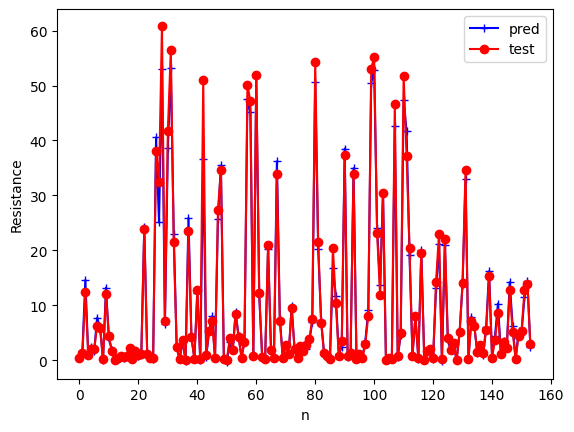

In [ ]:
fig, ax = plt.subplots()
p_pred = ax.plot(y_pred_neural, marker='+', c='b', label='pred')
p_test = ax.plot(Y_test.to_numpy(), marker='o', c='r', label='test')


ax.set_ylabel('Resistance')
ax.set_xlabel('n')
plt.legend()
plt.show()

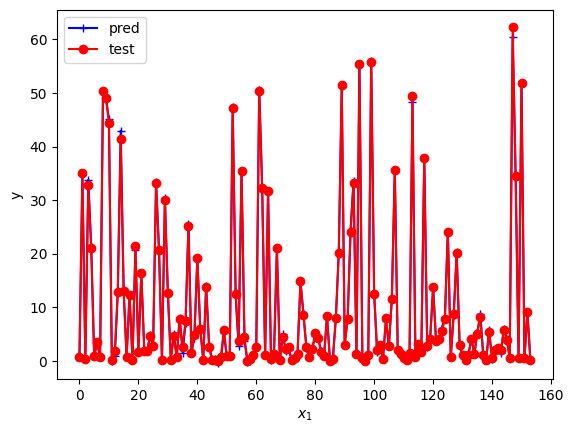

RMSE for linear regression: 0.36525229964576056


In [ ]:
Y_trainpred_neural = neuralpipe.predict(x_train)
fig, ax = plt.subplots()
p_trainpred = ax.plot(Y_trainpred_neural, marker='+', c='b', label='pred')
p_train = ax.plot(Y_train.to_numpy(), marker='o', c='r', label='test')


ax.set_ylabel('y')
ax.set_xlabel('$x_1$')
plt.legend()
plt.show()
print("RMSE for neural network:", np.sqrt(np.mean((Y_train-Y_trainpred_neural)**2)))

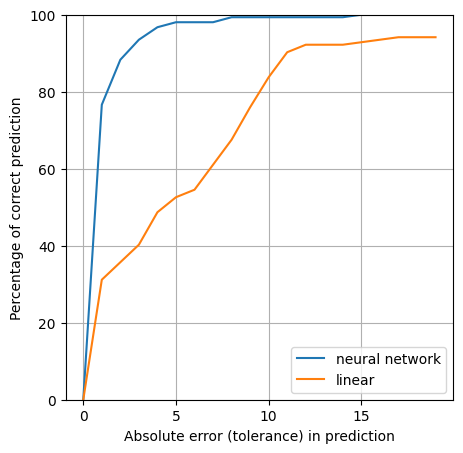

In [71]:
tol_max = 20
rec_neural=[]
rec_linear=[]

for i in range(tol_max):
    rec_neural.append(rec(y_pred_neural, Y_test, i))
    rec_linear.append(rec(Y_pred_non_negative, Y_test, i))

plt.figure(figsize=(5,5))
#plt.title("REC curve for Ridge regression\n")
plt.xlabel("Absolute error (tolerance) in prediction")
plt.ylabel("Percentage of correct prediction")
plt.xticks([i*5 for i in range(tol_max+1)])
plt.ylim(0,100)
plt.yticks([i*20 for i in range(6)])
plt.grid(True)
plt.plot(range(tol_max),rec_neural,label = 'neural network')
plt.plot(range(tol_max),rec_linear, label='linear')
plt.legend()
plt.show()

Text(0, 0.5, 'Residuary Resistance per unit weight')

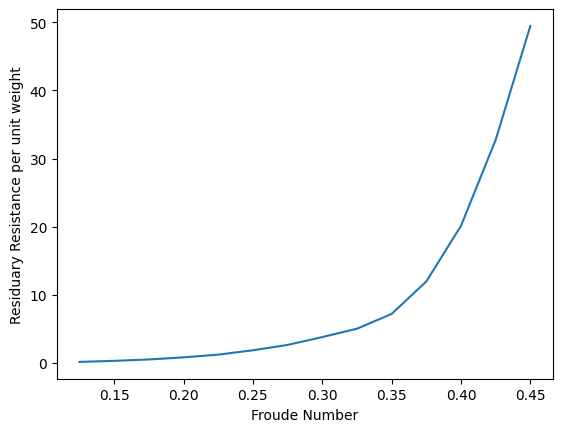

In [79]:
froude = data["Froude"][0:14]
resistances = data["Resistance"][0:14]
plt.plot(froude,resistances)
plt.xlabel('Froude Number')
plt.ylabel('Residuary Resistance per unit weight')

In [ ]:
from sklearn.metrics import r2_score

coefficient_of_dermination = r2_score(Y_pred_non_negative, Y_test)
print(coefficient_of_dermination)
coefficient_of_dermination = r2_score(y_pred_neural, Y_test)
print(coefficient_of_dermination)

0.35369839024192773
0.9837535110886448
